In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pmdarima as pm
import pickle
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from xgboost import XGBRegressor
from sklearn.impute import KNNImputer
from scipy.stats import pearsonr

2024-08-31 09:51:23.365875: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('/Users/anithasmac/PycharmProjects/FinalProject/Final_data.csv')

In [3]:
data

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week
0,1,1,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,A,151315,2010,2,5
1,1,1,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,A,151315,2010,2,6
2,1,1,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,A,151315,2010,2,7
3,1,1,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,A,151315,2010,2,8
4,1,1,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,A,151315,2010,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221,2012,9,39
421566,45,98,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,B,118221,2012,10,40
421567,45,98,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,B,118221,2012,10,41
421568,45,98,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,B,118221,2012,10,42


In [4]:
data.shape

(421570, 18)

In [5]:
data.dtypes

Store             int64
Dept              int64
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
Year              int64
Month             int64
Week              int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   IsHoliday     421570 non-null  bool   
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     421570 non-null  float64
 7   MarkDown2     421570 non-null  float64
 8   MarkDown3     421570 non-null  float64
 9   MarkDown4     421570 non-null  float64
 10  MarkDown5     421570 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  Type          421570 non-null  object 
 14  Size          421570 non-null  int64  
 15  Year          421570 non-null  int64  
 16  Month         421570 non-null  int64  
 17  Week          421570 non-null  int64  
dtypes: b

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,421570.0,2590.074819,6052.385934,0.000,0.000000,0.00000,2809.050000,88646.760000
MarkDown2,421570.0,879.974298,5084.538801,-265.760,0.000000,0.00000,2.200000,104519.540000
MarkDown3,421570.0,468.087665,5528.873453,-29.100,0.000000,0.00000,4.540000,141630.610000
MarkDown4,421570.0,1083.132268,3894.529945,0.000,0.000000,0.00000,425.290000,67474.850000
MarkDown5,421570.0,1662.772385,4207.629321,0.000,0.000000,0.00000,2168.040000,108519.280000


In [8]:
data.isnull().sum()

Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Year            0
Month           0
Week            0
dtype: int64

In [9]:
# Encode Type categorical column
encoder = LabelEncoder()
data['Type'] = encoder.fit_transform(data['Type'])

### Analyzing Correlations Between Sales and Features

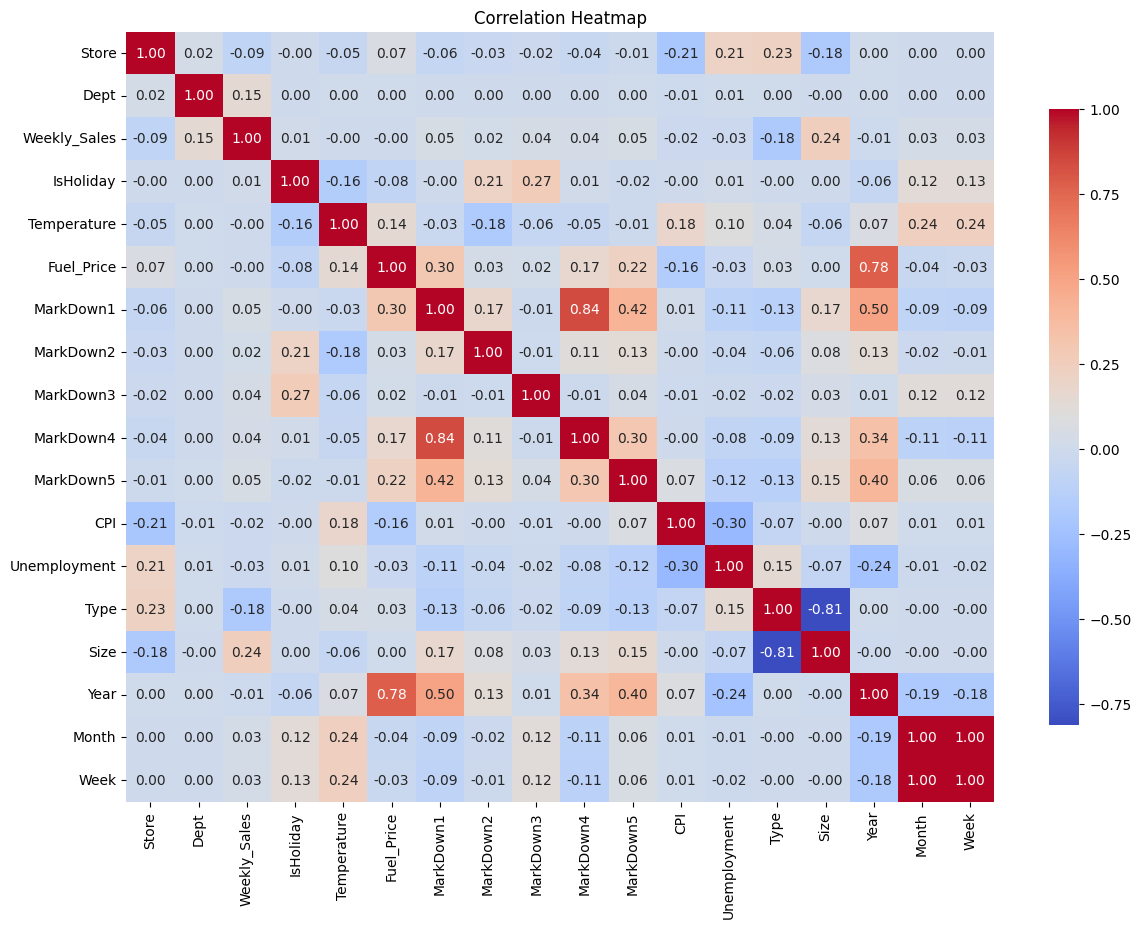

In [10]:
# Correlation matrix heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap')
plt.show()

In [11]:
data.corr()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week
Store,1.000000,0.024004,-0.085195,-0.000548,-0.050097,0.065290,-0.059844,-0.033829,-0.020331,-0.042724,-0.012452,-0.211088,0.208552,0.226410,-0.182881,0.002997,0.001011,0.001031
Dept,0.024004,1.000000,0.148032,0.000916,0.004437,0.003572,0.001494,0.000587,0.001475,0.001937,0.002668,-0.007477,0.007837,0.003708,-0.002966,0.003738,0.000904,0.000882
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,-0.002312,-0.000120,0.047172,0.020716,0.038562,0.037467,0.050465,-0.020921,-0.025864,-0.182242,0.243828,-0.010111,0.028409,0.027673
IsHoliday,-0.000548,0.000916,0.012774,1.000000,-0.155949,-0.078281,-0.003521,0.207604,0.266471,0.011565,-0.015235,-0.001944,0.010460,-0.000798,0.000593,-0.056746,0.123376,0.128184
Temperature,-0.050097,0.004437,-0.002312,-0.155949,1.000000,0.143859,-0.026415,-0.179672,-0.056026,-0.050281,-0.014752,0.182112,0.096730,0.042981,-0.058313,0.065814,0.235983,0.236276
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.143859,1.000000,0.297056,0.029153,0.018615,0.166622,0.215420,-0.164210,-0.033853,0.029687,0.003361,0.779633,-0.040876,-0.031140
MarkDown1,-0.059844,0.001494,0.047172,-0.003521,-0.026415,0.297056,1.000000,0.174868,-0.014411,0.838904,0.415050,0.010915,-0.105168,-0.126345,0.169788,0.501044,-0.089206,-0.093572
MarkDown2,-0.033829,0.000587,0.020716,0.207604,-0.179672,0.029153,0.174868,1.000000,-0.006080,0.113250,0.131735,-0.003554,-0.041427,-0.055318,0.078372,0.131867,-0.019360,-0.012812
MarkDown3,-0.020331,0.001475,0.038562,0.266471,-0.056026,0.018615,-0.014411,-0.006080,1.000000,-0.012020,0.042471,-0.005839,-0.018078,-0.024013,0.033641,0.006789,0.116031,0.122323
MarkDown4,-0.042724,0.001937,0.037467,0.011565,-0.050281,0.166622,0.838904,0.113250,-0.012020,1.000000,0.303370,-0.002047,-0.076513,-0.089770,0.127334,0.335340,-0.105569,-0.114168


### 2. EDA 

#### Sales Trends Over Week

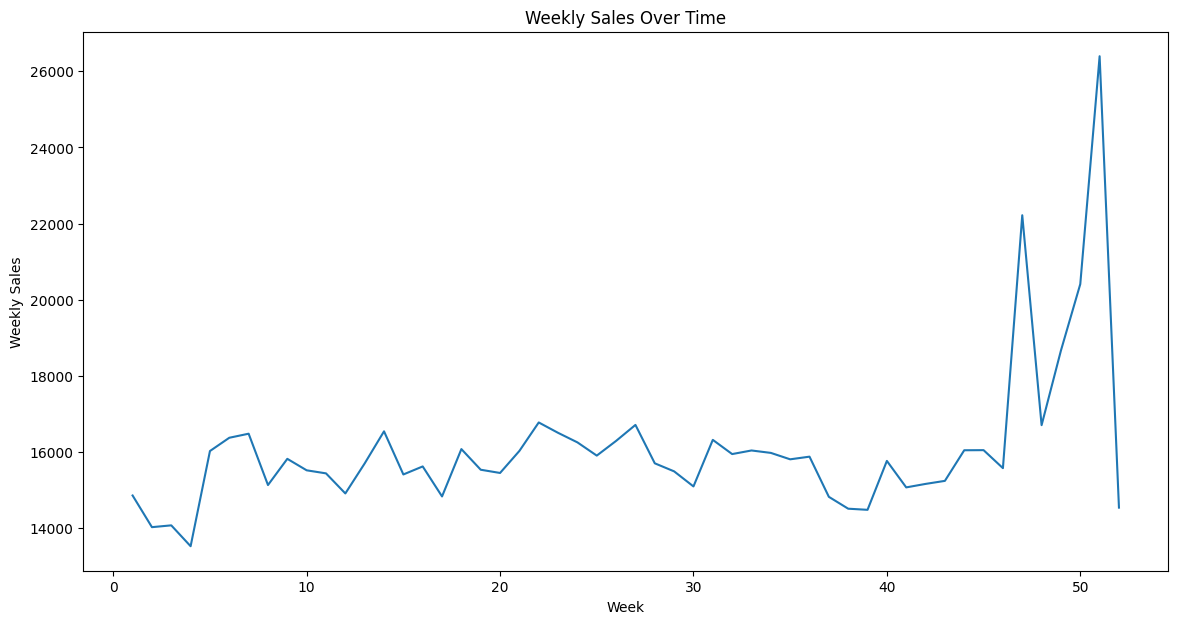

In [12]:
# Plot weekly sales over week
plt.figure(figsize=(14, 7))
sns.lineplot(x='Week', y='Weekly_Sales', data=data, errorbar=None)
plt.title('Weekly Sales Over Time')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.show()

#### Seasonality by Month

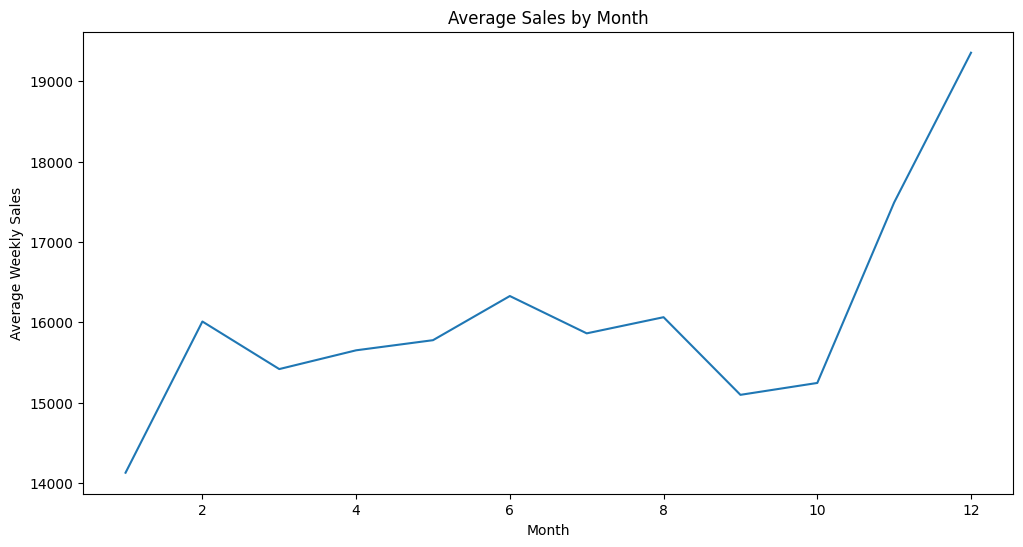

In [13]:
# Plot average sales per month
plt.figure(figsize=(12, 6))
data.groupby('Month')['Weekly_Sales'].mean().plot()
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.show()

#### Impact of Holidays

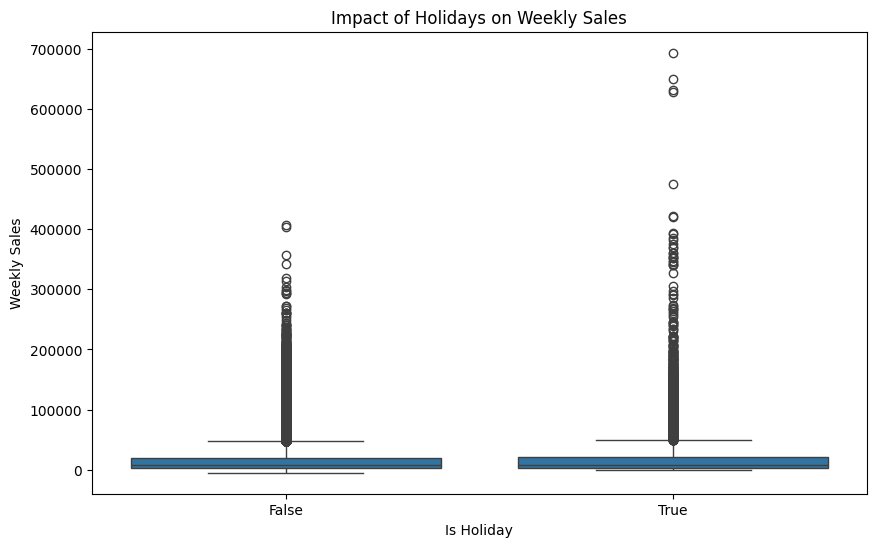

In [14]:
# Boxplot for holiday vs non-holiday sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=data)
plt.title('Impact of Holidays on Weekly Sales')
plt.xlabel('Is Holiday')
plt.ylabel('Weekly Sales')
plt.show()

#### Impact of MarkDowns

/var/folders/qm/3svq6sqj7m57_kz_k8knmjx40000gn/T/ipykernel_878/1608028648.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


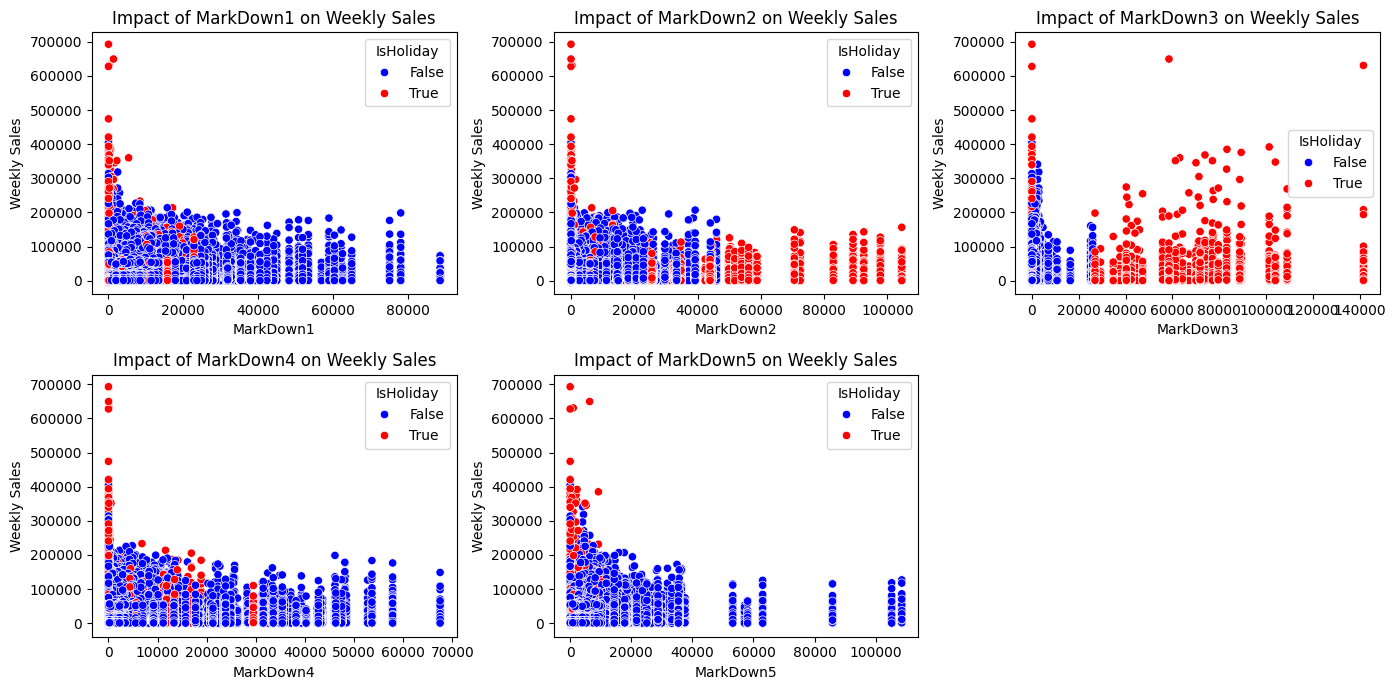

In [15]:
# Scatter plot for Markdown vs Weekly Sales
plt.figure(figsize=(14, 7))
for i in range(1, 6):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=f'MarkDown{i}', y='Weekly_Sales', hue='IsHoliday', data=data, palette=['blue', 'red'])
    plt.title(f'Impact of MarkDown{i} on Weekly Sales')
    plt.xlabel(f'MarkDown{i}')
    plt.ylabel('Weekly Sales')
plt.tight_layout()
plt.show()

#### Store and Department Analysis

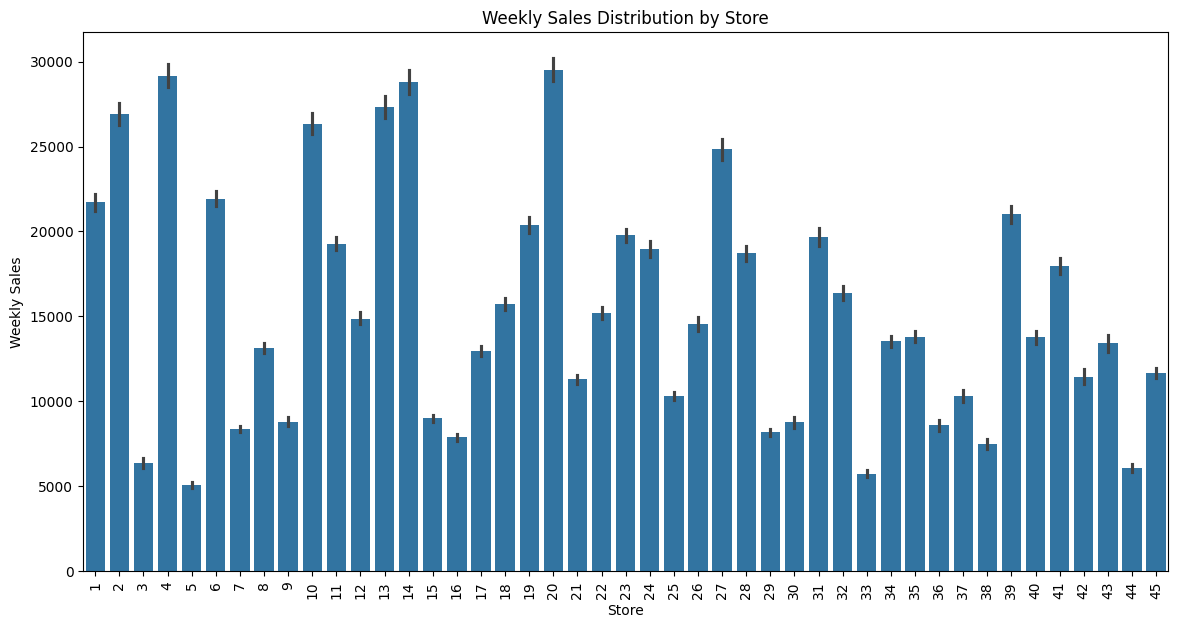

In [16]:
# Barplot for sales by store
plt.figure(figsize=(14, 7))
sns.barplot(x='Store', y='Weekly_Sales', data=data)
plt.title('Weekly Sales Distribution by Store')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=90)
plt.show()

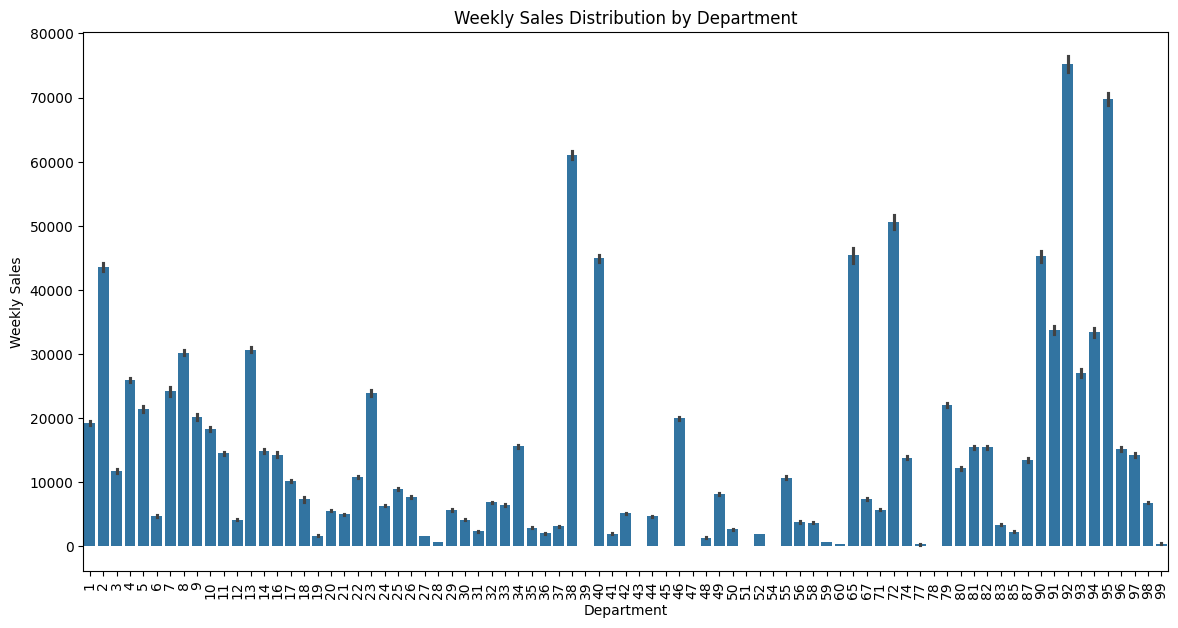

In [17]:
# Barplot for sales by department
plt.figure(figsize=(14, 7))
sns.barplot(x='Dept', y='Weekly_Sales', data=data)
plt.title('Weekly Sales Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=90)
plt.show()

### 3. Feature Engineering:

#### Feature engineering is crucial for improving model performance by creating additional features that capture underlying patterns and relationships in the data. 

#### Create Lagged Sales Features

In [18]:
lag_periods = [1, 2, 4, 12]  # E.g., 1 week, 2 weeks, 4 weeks, 12 weeks

In [19]:
for lag in lag_periods:
    data[f'Lagged_Sales_{lag}_weeks'] = data.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(lag)

#### Create Rolling Averages

##### Rolling averages help smooth out sales data and capture trends over time.

##### Calculate Rolling Averages

In [20]:
rolling_windows = [4, 12, 26]  # E.g., 4 weeks, 12 weeks, 26 weeks

In [21]:
for window in rolling_windows:
    data[f'Rolling_Avg_{window}_weeks'] = data.groupby(['Store', 'Dept'])['Weekly_Sales'].rolling(window=window, min_periods=1).mean().reset_index(level=[0, 1], drop=True)

####  Create Holiday Flags

##### Holiday flags help capture the effect of holidays on sales.

#### Create Binary Holiday Feature

In [22]:
data['Is_Holiday_Week'] = data['IsHoliday'].astype(int)

In [23]:
data['Lagged_Holiday_1_week'] = data.groupby(['Store', 'Dept'])['Is_Holiday_Week'].shift(1)
data['Lagged_Holiday_2_weeks'] = data.groupby(['Store', 'Dept'])['Is_Holiday_Week'].shift(2)

In [24]:
data.shape

(421570, 28)

In [25]:
data

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Lagged_Sales_1_weeks,Lagged_Sales_2_weeks,Lagged_Sales_4_weeks,Lagged_Sales_12_weeks,Rolling_Avg_4_weeks,Rolling_Avg_12_weeks,Rolling_Avg_26_weeks,Is_Holiday_Week,Lagged_Holiday_1_week,Lagged_Holiday_2_weeks
0,1,1,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,24924.500000,24924.500000,24924.500000,0,NaN,NaN
1,1,1,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,...,24924.50,NaN,NaN,NaN,35481.995000,35481.995000,35481.995000,1,0.0,NaN
2,1,1,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,...,46039.49,24924.50,NaN,NaN,37519.846667,37519.846667,37519.846667,0,1.0,0.0
3,1,1,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,...,41595.55,46039.49,NaN,NaN,32990.770000,32990.770000,32990.770000,0,0.0,1.0
4,1,1,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,...,19403.54,41595.55,24924.50,NaN,32216.620000,30758.196000,30758.196000,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,...,467.30,605.96,346.04,659.65,483.517500,553.146667,644.127692,0,0.0,0.0
421566,45,98,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,...,508.37,467.30,352.44,695.21,552.432500,547.554167,638.335385,0,0.0,0.0
421567,45,98,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,...,628.10,508.37,605.96,845.30,666.197500,565.530833,657.638462,0,0.0,0.0
421568,45,98,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,...,1061.02,628.10,467.30,657.63,739.375000,574.062500,663.569615,0,0.0,0.0


In [26]:
data.isnull().sum()

Store                         0
Dept                          0
Weekly_Sales                  0
IsHoliday                     0
Temperature                   0
Fuel_Price                    0
MarkDown1                     0
MarkDown2                     0
MarkDown3                     0
MarkDown4                     0
MarkDown5                     0
CPI                           0
Unemployment                  0
Type                          0
Size                          0
Year                          0
Month                         0
Week                          0
Lagged_Sales_1_weeks       3331
Lagged_Sales_2_weeks       6625
Lagged_Sales_4_weeks      13134
Lagged_Sales_12_weeks     38615
Rolling_Avg_4_weeks           0
Rolling_Avg_12_weeks          0
Rolling_Avg_26_weeks          0
Is_Holiday_Week               0
Lagged_Holiday_1_week      3331
Lagged_Holiday_2_weeks     6625
dtype: int64

### K-Nearest Neighbors (KNN) Imputation Technique:

#### KNN is a sophisticated imputation which fills missing values based on the values of the nearest neighbors.

In [27]:
# Initialize KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputer to numeric features
numeric_features = ['Lagged_Sales_1_weeks', 'Lagged_Sales_2_weeks', 'Lagged_Sales_4_weeks',
                    'Lagged_Sales_12_weeks', 'Lagged_Holiday_1_week', 'Lagged_Holiday_2_weeks']
data[numeric_features] = knn_imputer.fit_transform(data[numeric_features])

KeyboardInterrupt: 

In [39]:
data.isnull().sum()

Store                     0
Dept                      0
Weekly_Sales              0
IsHoliday                 0
Temperature               0
Fuel_Price                0
MarkDown1                 0
MarkDown2                 0
MarkDown3                 0
MarkDown4                 0
MarkDown5                 0
CPI                       0
Unemployment              0
Type                      0
Size                      0
Year                      0
Month                     0
Week                      0
Lagged_Sales_1_weeks      0
Lagged_Sales_2_weeks      0
Lagged_Sales_4_weeks      0
Lagged_Sales_12_weeks     0
Rolling_Avg_4_weeks       0
Rolling_Avg_12_weeks      0
Rolling_Avg_26_weeks      0
Is_Holiday_Week           0
Lagged_Holiday_1_week     0
Lagged_Holiday_2_weeks    0
dtype: int64

In [40]:
new_data = data.copy()

In [41]:
new_data.to_csv('New_data.csv', index=False)

In [28]:
new_data = pd.read_csv('/Users/anithasmac/PycharmProjects/FinalProject/New_data.csv')

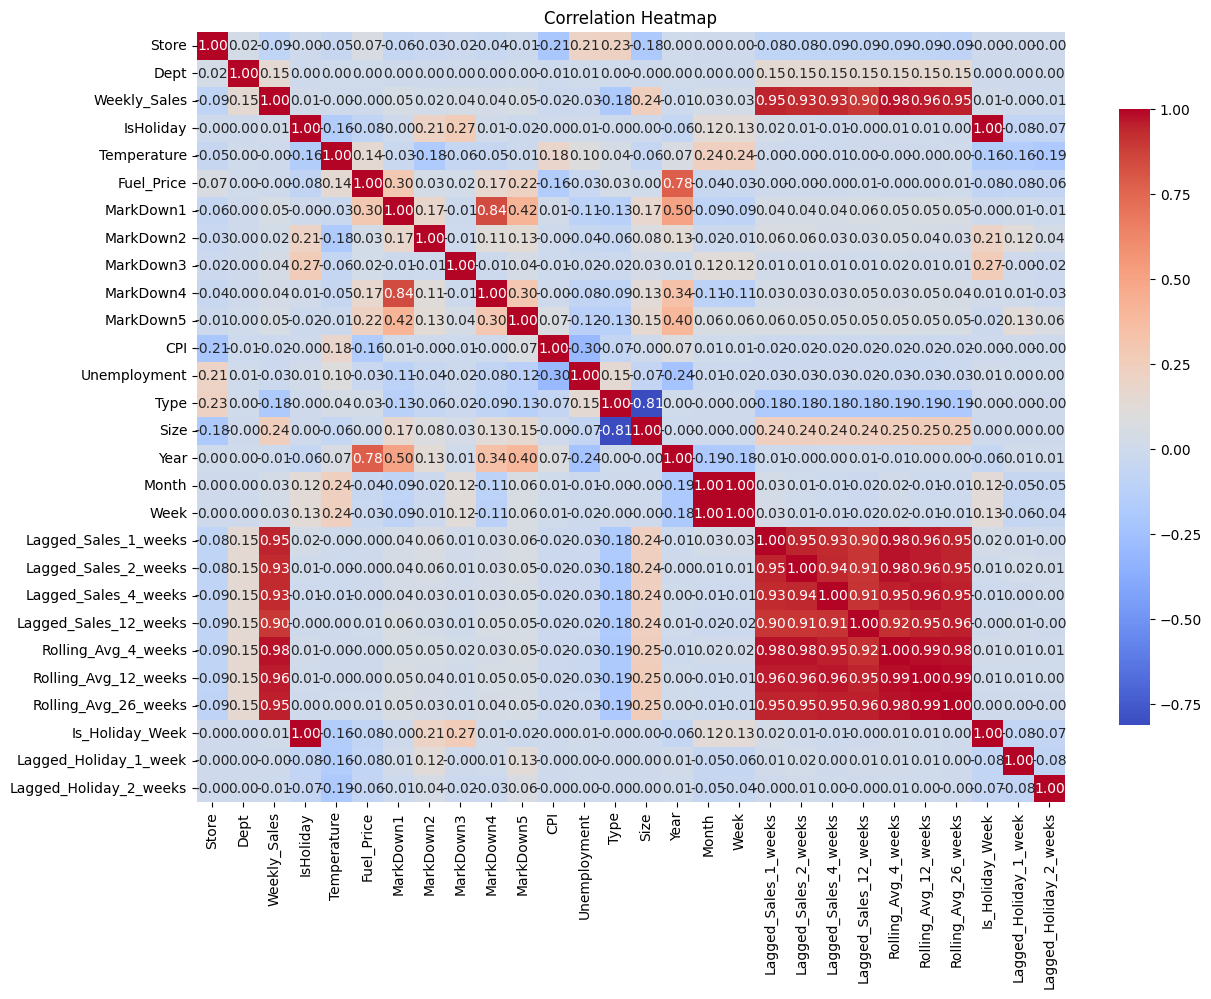

In [29]:
# Correlation matrix heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(new_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap')
plt.show()

### Hypothesis Testing 

In [30]:
# Initialize an empty DataFrame to store the Pearson correlation coefficients
pearson_corr_df = pd.DataFrame(columns=['Feature_1', 'Pearson_Coefficient', 'P_Value'])

# Iterate through each column in the DataFrame except 'Weekly_Sales'
for col in new_data.columns:
    if col != 'Weekly_Sales':  # Avoid calculating the correlation of a column with itself
        # Calculate the Pearson correlation coefficient and p-value between the column and 'Weekly_Sales'
        corr, p_value = pearsonr(new_data[col].dropna(), new_data['Weekly_Sales'].dropna())
        
        # Create a DataFrame row with the results
        row = pd.DataFrame({
            'Feature_1': [col],
            'Pearson_Coefficient': [corr],
            'P_Value': [p_value]
        })
        
        # Concatenate the new row to the pearson_corr_df
        pearson_corr_df = pd.concat([pearson_corr_df, row], ignore_index=True)

# Display the Pearson correlation DataFrame
print(pearson_corr_df)

/var/folders/qm/3svq6sqj7m57_kz_k8knmjx40000gn/T/ipykernel_878/3243193690.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pearson_corr_df = pd.concat([pearson_corr_df, row], ignore_index=True)


                 Feature_1  Pearson_Coefficient        P_Value
0                    Store            -0.085195   0.000000e+00
1                     Dept             0.148032   0.000000e+00
2                IsHoliday             0.012774   1.091222e-16
3              Temperature            -0.002312   1.332436e-01
4               Fuel_Price            -0.000120   9.377439e-01
5                MarkDown1             0.047172  3.059544e-206
6                MarkDown2             0.020716   2.985280e-41
7                MarkDown3             0.038562  1.884000e-138
8                MarkDown4             0.037467  8.292246e-131
9                MarkDown5             0.050465  8.988668e-236
10                     CPI            -0.020921   4.892587e-42
11            Unemployment            -0.025864   2.625560e-63
12                    Type            -0.182242   0.000000e+00
13                    Size             0.243828   0.000000e+00
14                    Year            -0.010111   5.192

In [31]:
pearson_corr_df

,Feature_1,Pearson_Coefficient,P_Value
0,Store,-0.085195,0.000000e+00
1,Dept,0.148032,0.000000e+00
2,IsHoliday,0.012774,1.091222e-16
3,Temperature,-0.002312,1.332436e-01
4,Fuel_Price,-0.000120,9.377439e-01
5,MarkDown1,0.047172,3.059544e-206
6,MarkDown2,0.020716,2.985280e-41
7,MarkDown3,0.038562,1.884000e-138
8,MarkDown4,0.037467,8.292246e-131
9,MarkDown5,0.050465,8.988668e-236


In [32]:
# Filter the DataFrame to find features with a p-value less than 0.05
significant_features = pearson_corr_df[pearson_corr_df['P_Value'].abs() < 0.05]

# Check if there are any significant relationships
if not significant_features.empty:
    print("Reject the null hypothesis. There is a significant relationship.")
    print(significant_features)
else:
    print("Accept the null hypothesis. There is no significant relationship.")


Reject the null hypothesis. There is a significant relationship.
                 Feature_1  Pearson_Coefficient        P_Value
0                    Store            -0.085195   0.000000e+00
1                     Dept             0.148032   0.000000e+00
2                IsHoliday             0.012774   1.091222e-16
5                MarkDown1             0.047172  3.059544e-206
6                MarkDown2             0.020716   2.985280e-41
7                MarkDown3             0.038562  1.884000e-138
8                MarkDown4             0.037467  8.292246e-131
9                MarkDown5             0.050465  8.988668e-236
10                     CPI            -0.020921   4.892587e-42
11            Unemployment            -0.025864   2.625560e-63
12                    Type            -0.182242   0.000000e+00
13                    Size             0.243828   0.000000e+00
14                    Year            -0.010111   5.192265e-11
15                   Month             0.028409   5.2

In [33]:
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.000000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.000000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.030000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.090000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.452000,3.738000,4.468000
MarkDown1,421570.0,2590.074819,6052.385934,0.000,0.000000,0.000000,2809.050000,88646.760000
MarkDown2,421570.0,879.974298,5084.538801,-265.760,0.000000,0.000000,2.200000,104519.540000
MarkDown3,421570.0,468.087665,5528.873453,-29.100,0.000000,0.000000,4.540000,141630.610000
MarkDown4,421570.0,1083.132268,3894.529945,0.000,0.000000,0.000000,425.290000,67474.850000
MarkDown5,421570.0,1662.772385,4207.629321,0.000,0.000000,0.000000,2168.040000,108519.280000


In [34]:
new_data.isnull().sum()

Store                     0
Dept                      0
Weekly_Sales              0
IsHoliday                 0
Temperature               0
Fuel_Price                0
MarkDown1                 0
MarkDown2                 0
MarkDown3                 0
MarkDown4                 0
MarkDown5                 0
CPI                       0
Unemployment              0
Type                      0
Size                      0
Year                      0
Month                     0
Week                      0
Lagged_Sales_1_weeks      0
Lagged_Sales_2_weeks      0
Lagged_Sales_4_weeks      0
Lagged_Sales_12_weeks     0
Rolling_Avg_4_weeks       0
Rolling_Avg_12_weeks      0
Rolling_Avg_26_weeks      0
Is_Holiday_Week           0
Lagged_Holiday_1_week     0
Lagged_Holiday_2_weeks    0
dtype: int64

### Feature Manipulation

#### Steps for Calculating VIF

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Ensure all columns are numeric
new_data_numeric = new_data.select_dtypes(include=[np.number])

# Add a constant term for the intercept
X = add_constant(new_data_numeric)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Drop the constant term from VIF results
vif_data = vif_data[vif_data["Feature"] != 'const']

print(vif_data)

                   Feature         VIF
1                    Store    1.136978
2                     Dept    1.027416
3             Weekly_Sales   27.606565
4              Temperature    1.363567
5               Fuel_Price    3.612594
6                MarkDown1    4.494200
7                MarkDown2    1.174348
8                MarkDown3    1.115600
9                MarkDown4    3.594777
10               MarkDown5    1.422683
11                     CPI    1.354220
12            Unemployment    1.317237
13                    Type    3.066490
14                    Size    3.162316
15                    Year    4.930289
16                   Month  136.572711
17                    Week  136.023369
18    Lagged_Sales_1_weeks   23.461895
19    Lagged_Sales_2_weeks   27.305492
20    Lagged_Sales_4_weeks   15.208429
21   Lagged_Sales_12_weeks   12.754786
22     Rolling_Avg_4_weeks  176.314521
23    Rolling_Avg_12_weeks  131.250763
24    Rolling_Avg_26_weeks   80.204037
25         Is_Holiday_Wee

### Remove Features with the Highest VIFs (except target variable) to ensure multicollinearity has been reduced

In [35]:
new_data.drop(columns=['Rolling_Avg_4_weeks', 'Rolling_Avg_12_weeks', 'Rolling_Avg_26_weeks', 'Month', 'Week'], axis=1, inplace=True)

In [36]:
new_data.shape

(421570, 23)

In [87]:
# Ensure all columns are numeric
new_data_numeric = new_data.select_dtypes(include=[np.number])

# Add a constant term for the intercept
X = add_constant(new_data_numeric)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Drop the constant term from VIF results
vif_data = vif_data[vif_data["Feature"] != 'const']

print(vif_data)

                   Feature        VIF
1                    Store   1.135778
2                     Dept   1.026871
3             Weekly_Sales  12.302329
4              Temperature   1.261153
5               Fuel_Price   3.441517
6                MarkDown1   4.457681
7                MarkDown2   1.165495
8                MarkDown3   1.100776
9                MarkDown4   3.538805
10               MarkDown5   1.374915
11                     CPI   1.353212
12            Unemployment   1.287596
13                    Type   3.066327
14                    Size   3.157444
15                    Year   4.369072
16    Lagged_Sales_1_weeks  15.151311
17    Lagged_Sales_2_weeks  14.000699
18    Lagged_Sales_4_weeks  11.619660
19   Lagged_Sales_12_weeks   7.191580
20         Is_Holiday_Week   1.197981
21   Lagged_Holiday_1_week   1.115877
22  Lagged_Holiday_2_weeks   1.094935


In [114]:
new_data.to_csv('Model_Data.csv', index=False)

### 4. Model Evaluation and Selection

#### 4.1 Simulate sales with markdowns

In [37]:
X = new_data.drop(columns=['Weekly_Sales'])
y = new_data['Weekly_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
def model_pipeline(model):
    # Normalize the training data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit the model on the training data
    model_instance = model()
    model_instance.fit(X_train_scaled, y_train)
    
    # Predict and evaluate
    y_pred = model_instance.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)    
    
    # Compile results in a dictionary
    accuracy = {
        'Model': model.__name__,
        'R2_Score': r2,
        'MAE': mae,
        'RMSE': rmse      
    }
    
    # Print the evaluation metrics
    print(accuracy)

    return model_instance

In [39]:
linear_model = model_pipeline(LinearRegression)
random_forest_model = model_pipeline(RandomForestRegressor)
xgboost_model = model_pipeline(XGBRegressor)

{'Model': 'LinearRegression', 'R2_Score': 0.9188476031707496, 'MAE': 2282.845590561055, 'RMSE': 6505.276392972022}
{'Model': 'RandomForestRegressor', 'R2_Score': 0.9542030644942245, 'MAE': 1719.7718016153904, 'RMSE': 4886.898139817879}
{'Model': 'XGBRegressor', 'R2_Score': 0.9631008257958763, 'MAE': 1727.9404011555698, 'RMSE': 4386.553203666151}


##### ARIMA (AutoRegressive Integrated Moving Average)

In [111]:
# Initialize scaler
scaler = StandardScaler()

# Scale the training data
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# Fit the ARIMA model
arima_model = ARIMA(y_train_scaled, order=(1, 1, 1))
arima_model_fit = arima_model.fit()

# Forecast on the scaled data
y_pred_scaled = arima_model_fit.forecast(steps=len(y_test))

# Inverse transform the predictions
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Ensure y_test is also scaled correctly
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 
# R2 is generally not used for ARIMA model evaluation

# Compile results in a dictionary
accuracy = {
    'Model': 'ARIMA',
    'MAE': mae,
    'RMSE': rmse
}

# Print the evaluation metrics
print(accuracy)

{'Model': 'ARIMA', 'MAE': 15239.477942625825, 'RMSE': 22836.39679837826}


##### LSTM (Long Short-Term Memory)

##### The purpose of an activation function is to introduce non-linearity into the model, allowing the network to learn and represent complex patterns in the data.

In [113]:
# Scale the features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Reshape data for LSTM (samples, time steps, features)
time_steps = 1
X_lstm = np.reshape(X_scaled, (X_scaled.shape[0], time_steps, X_scaled.shape[1]))

# Split the data into training and testing sets
X_train_lstm, X_test_lstm, y_train, y_test = train_test_split(X_lstm, y, test_size=0.2, random_state=42)

# Normalize the target variable
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(time_steps, X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train_lstm, y_train_scaled, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test_scaled))

# Predict on validation data
y_pred_scaled = lstm_model.predict(X_test_lstm)

# Inverse transform the predictions and the target values
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_inv = scaler_y.inverse_transform(y_test_scaled)

# Evaluate LSTM model
lstm_rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred))
lstm_mae = mean_absolute_error(y_test_inv, y_pred)
lstm_r2 = r2_score(y_test_inv, y_pred)

# Compile results in a dictionary
accuracy = {
    'Model': 'LSTM',
    'R2': lstm_r2,
    'MAE': lstm_mae,
    'RMSE': lstm_rmse
}

# Print the evaluation metrics
print(accuracy)

Epoch 1/10


/Applications/anaconda3/envs/my-env/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10540/10540 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.0933 - val_loss: 0.0603
Epoch 2/10
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 0.0621 - val_loss: 0.0585
Epoch 3/10
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 0.0548 - val_loss: 0.0551
Epoch 4/10
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.0600 - val_loss: 0.0547
Epoch 5/10
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 0.0588 - val_loss: 0.0550
Epoch 6/10
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 0.0550 - val_loss: 0.0596
Epoch 7/10
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 0.0517 - val_loss: 0.0520
Epoch 8/10
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 0.0521 - val_loss: 0.0521
Epoch 9/10
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.0488 - val_loss: 0.0505
Epoch 10/10
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 0.0564 - val_loss: 0.0501
2635/2635 ━━━━━━━━━━━━━━━━━━━━ 2s 880us/step
{'Model': 'LSTM', 'R2': 0.9505953936568089, 'MAE': 1923

### Evaluation results

In [ ]:
{'Model': 'LinearRegression', 'R2_Score': 0.9188476031707496, 'MAE': 2282.845590561055, 'RMSE': 6505.276392972022}
{'Model': 'RandomForestRegressor', 'R2_Score': 0.9541855206828628, 'MAE': 1718.767889816638, 'RMSE': 4887.834082462816}
{'Model': 'XGBRegressor', 'R2_Score': 0.9631008257958763, 'MAE': 1727.9404011555698, 'RMSE': 4386.553203666151}
{'Model': 'ARIMA', 'MAE': 15239.477942625825, 'RMSE': 22836.39679837826}
{'Model': 'LSTM', 'R2': 0.9505953936568089, 'MAE': 1923.296669218078, 'RMSE': 5075.733358098977}

### Grid Search

##### ARIMA

In [115]:
# Fit ARIMA model with auto_arima
model = pm.auto_arima(y_train, seasonal=False, stepwise=True, trace=True)

# Print the best model parameters
print("Best ARIMA parameters:", model.get_params())

# Forecast and evaluate
y_pred = model.predict(n_periods=len(y_test))
y_test_inv = y_test.values
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
print(f"ARIMA - MAE: {mae}, RMSE: {rmse}")

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=56.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7857866.492, Time=3.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=7818476.659, Time=4.20 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=7831736.653, Time=7.33 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=7797071.386, Time=4.74 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=7783072.573, Time=5.76 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=7773765.334, Time=7.38 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=7766765.841, Time=9.27 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=180.18 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=199.81 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=7721940.852, Time=19.92 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=7721939.216, Time=13.91 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=7721937.522, Time=11.53 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=7721937.503, Time=9.02 sec
 ARIMA(

/Applications/anaconda3/envs/my-env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Applications/anaconda3/envs/my-env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


ARIMA - MAE: 15169.353983592433, RMSE: 22835.74164619499


##### XGBoost

In [118]:
# Define the model
xgb = XGBRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 0.9, 1.0]
}

# Setup the GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, verbose=2)

# Fit the model
grid_search_xgb.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search_xgb.best_params_)
print("Best score:", grid_search_xgb.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.6s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   1.6s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   1.6

##### Random Forest

In [ ]:
# Define the model
rf = RandomForestRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Setup the GridSearchCV
grid_search_random = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2)

# Fit the model
grid_search_random.fit(X_train, y_train)


# Print the best parameters and best score
print("Best parameters:", grid_search_random.best_params_)
print("Best score:", grid_search_random.best_score_)

In [145]:
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=11.7min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=11.6min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=11.6min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=11.7min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=11.7min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=23.5min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=23.7min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=23.2min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=23.4min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=23.5min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=10.9min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=10.9min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=11.0min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=11.0min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=11.3min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=22.5min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=22.2min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=22.2min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=22.3min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=22.3min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=10.4min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=10.4min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=10.4min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=10.4min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=10.4min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=20.9min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=20.8min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=21.0min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=20.9min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=20.8min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=10.2min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=10.2min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=10.3min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=10.2min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=10.3min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=20.7min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=20.6min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=20.4min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=20.5min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=20.5min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 4.0min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 4.0min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 3.9min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 4.0min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 4.0min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 7.9min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 7.6min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 7.4min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 7.4min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 7.4min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 3.7min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 3.7min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 3.7min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 3.7min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 3.7min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 7.5min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 7.5min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 7.5min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 7.5min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 7.5min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time= 3.8min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time= 3.7min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time= 3.7min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time= 3.7min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time= 3.7min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 7.5min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 7.5min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 7.5min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 7.5min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 7.5min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 3.7min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 3.7min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 3.7min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 3.7min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 3.7min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 8.0min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 8.1min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 8.0min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 8.1min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 8.1min
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best score: 0.9491502405627072

SyntaxError: invalid decimal literal (786137180.py, line 2)

### Export XGBoost model as pickle file as it is performing good against other models

In [127]:
# Save the model
with open('XGBoost.pkl', 'wb') as file:
    pickle.dump(xgboost_model, file)

#### 4.2 Simulate sales without markdowns

In [40]:
no_markdown = new_data.copy()

In [41]:
no_markdown.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5'], axis=1, inplace=True)

In [42]:
no_markdown.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size', 'Year',
       'Lagged_Sales_1_weeks', 'Lagged_Sales_2_weeks', 'Lagged_Sales_4_weeks',
       'Lagged_Sales_12_weeks', 'Is_Holiday_Week', 'Lagged_Holiday_1_week',
       'Lagged_Holiday_2_weeks'],
      dtype='object')

In [144]:
new_data.to_csv('Model_Data_Without_Markdowns.csv', index=False)

In [43]:
X = no_markdown.drop(columns=['Weekly_Sales'])
y = no_markdown['Weekly_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
linear_model_wo_markdown = model_pipeline(LinearRegression)
random_forest_model_wo_markdown = model_pipeline(RandomForestRegressor)
xgboost_model_wo_markdown = model_pipeline(XGBRegressor)

{'Model': 'LinearRegression', 'R2_Score': 0.9171867554289438, 'MAE': 2280.852683856445, 'RMSE': 6571.507047085727}
{'Model': 'RandomForestRegressor', 'R2_Score': 0.9523804325317888, 'MAE': 1743.4746671252697, 'RMSE': 4983.194068873652}
{'Model': 'XGBRegressor', 'R2_Score': 0.9619103461397522, 'MAE': 1763.695510546333, 'RMSE': 4456.753259590839}


##### ARIMA

In [136]:
# Initialize scaler
scaler = StandardScaler()

# Scale the training data
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# Fit the ARIMA model
arima_model = ARIMA(y_train_scaled, order=(1, 1, 1))
arima_model_fit = arima_model.fit()

# Forecast on the scaled data
y_pred_scaled = arima_model_fit.forecast(steps=len(y_test))

# Inverse transform the predictions
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Ensure y_test is also scaled correctly
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 
# R2 is generally not used for ARIMA model evaluation

# Compile results in a dictionary
accuracy = {
    'Model': 'ARIMA',
    'MAE': mae,
    'RMSE': rmse
}

# Print the evaluation metrics
print(accuracy)

{'Model': 'ARIMA', 'MAE': 15239.477942625825, 'RMSE': 22836.39679837826}


##### LSTM

In [137]:
# Scale the features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Reshape data for LSTM (samples, time steps, features)
time_steps = 1
X_lstm = np.reshape(X_scaled, (X_scaled.shape[0], time_steps, X_scaled.shape[1]))

# Split the data into training and testing sets
X_train_lstm, X_test_lstm, y_train, y_test = train_test_split(X_lstm, y, test_size=0.2, random_state=42)

# Normalize the target variable
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(time_steps, X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train_lstm, y_train_scaled, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test_scaled))

# Predict on validation data
y_pred_scaled = lstm_model.predict(X_test_lstm)

# Inverse transform the predictions and the target values
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_inv = scaler_y.inverse_transform(y_test_scaled)

# Evaluate LSTM model
lstm_rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred))
lstm_mae = mean_absolute_error(y_test_inv, y_pred)
lstm_r2 = r2_score(y_test_inv, y_pred)

# Compile results in a dictionary
accuracy = {
    'Model': 'LSTM',
    'R2': lstm_r2,
    'MAE': lstm_mae,
    'RMSE': lstm_rmse
}

# Print the evaluation metrics
print(accuracy)

Epoch 1/10


/Applications/anaconda3/envs/my-env/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10540/10540 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.1106 - val_loss: 0.0639
Epoch 2/10
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.0605 - val_loss: 0.0633
Epoch 3/10
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.0631 - val_loss: 0.0588
Epoch 4/10
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.0619 - val_loss: 0.0596
Epoch 5/10
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.0578 - val_loss: 0.0567
Epoch 6/10
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0560 - val_loss: 0.0553
Epoch 7/10
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0592 - val_loss: 0.0552
Epoch 8/10
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.0535 - val_loss: 0.0545
Epoch 9/10
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.0547 - val_loss: 0.0552
Epoch 10/10
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.0584 - val_loss: 0.0560
2635/2635 ━━━━━━━━━━━━━━━━━━━━ 3s 973us/step
{'Model': 'LSTM', 'R2': 0.9447738937690804, 'MAE': 2069

### XGBoost is performing well without markdowns.

In [45]:
# Save the model
with open('XGBoostNoMarkdown.pkl', 'wb') as file:
    pickle.dump(xgboost_model_wo_markdown, file)